In [128]:
import pandas as pd
from utils import remove_limiters
from IPython.core.interactiveshell import InteractiveShell

test = remove_limiters()

InteractiveShell.ast_node_interactivity = "all"
data = pd.read_csv("beer/recipeData.csv", encoding = "ISO-8859-1")
# test

Setting limiters to none


In [129]:
data['StyleID'].value_counts()

7      11940
10      7581
134     2617
9       2277
4       2038
30      1753
86      1478
12      1268
92      1204
6       1152
175     1072
39      1044
169      988
114      961
132      929
162      919
170      919
129      897
94       869
56       864
45       830
11       787
65       784
87       675
68       659
14       654
148      638
24       625
111      596
15       571
26       563
21       538
22       530
155      514
75       502
20       496
58       484
159      481
81       466
150      442
37       438
67       432
145      430
25       422
27       395
167      395
28       391
34       390
115      364
72       360
144      356
23       354
19       344
31       344
5        341
109      340
102      333
85       331
157      323
151      318
90       309
116      300
152      287
113      284
105      276
118      271
35       271
93       263
108      260
63       253
53       240
50       237
54       237
160      230
13       227
66       222
147      221

In [130]:
import numpy as np

def data_equilize(database,column,oversample,undersample,threshold='mean'):
    # Equaliza a distribuição de dados com base em uma coluna "column"
    # Define se vai ocorrer undersampling ou oversampling de acordo com a variável "threshold"
    # Se um certo valor aparecer em quantidades maiores que as definidas por "threshold", faça o undersampling
    # Se um certo valor aparecer em quantidades menores que as definidas por "threshold", faça o oversampling
    if threshold == 'mean':
        data_threshold = database[column].value_counts().mean()
    elif threshold == 'median':
        data_threshold = database[column].value_counts().median()
    elif threshold == 'mode':
        data_threshold = database[column].value_counts().mode()
    else:
        data_threshold = threshold


    value_counts = database[column].value_counts()
    for index,value in value_counts.items():
        if value > data_threshold and undersample:
            # Remove random rows
            drop_indices = np.random.choice(database[database['StyleID'] == index].index, int(value - data_threshold), replace=False)
            database = database.drop(drop_indices)
        elif value < data_threshold and oversample:
            # Add random rows
            add_indices = np.random.choice(database[database['StyleID'] == index].index, int(data_threshold - value + 1), replace=True)
            new_rows = database.loc[add_indices]
            database = pd.concat([database, new_rows])
    return database


In [131]:
# indices = 10
# add_indices = np.random.choice(data[data['StyleID'] == 24].index, indices, replace=True)
# print(add_indices)
# data.iloc[add_indices]

In [132]:
data = data_equilize(data,'StyleID',True,True)

#row_deleted = int(data[data['StyleID'] == 7].sample(n=10,replace=True).index[0])


In [133]:
data['StyleID'].value_counts()

45     420
85     420
112    420
11     420
55     420
80     420
93     420
10     420
63     420
151    420
136    420
137    420
166    420
62     420
142    420
73     420
108    420
153    420
117    420
173    420
16     420
107    420
147    420
13     420
9      420
57     420
14     420
34     420
169    420
43     420
28     420
157    420
50     420
106    420
103    420
139    420
66     420
48     420
131    420
82     420
77     420
161    420
17     420
49     420
38     420
70     420
101    420
96     420
42     420
47     420
138    420
164    420
69     420
33     420
53     420
74     420
146    420
78     420
18     420
89     420
130    420
60     420
79     420
140    420
126    420
3      420
123    420
88     420
158    420
2      420
141    420
84     420
98     420
125    420
118    420
172    420
61     420
97     420
122    420
110    420
127    420
99     420
91     420
128    420
149    420
95     420
133    420
168    420
8      420
102    420
67     420

In [134]:
data.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumking-clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgisk-blonde-50-l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
6,7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-pliny-the-elder-original-,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,1051.0
8,9,Chocolate Vanilla Porter,/homebrew/recipe/view/29265/chocolate-vanilla-porter,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,30.28,75,1.042,73.0,NaN,Specific Gravity,All Grain,NaN,NaN,corn sugar,4 oz,116.0


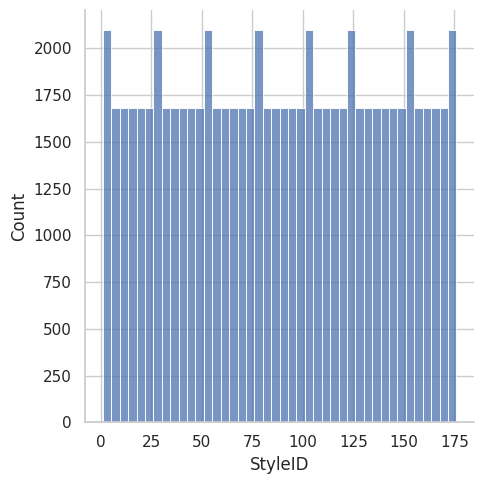

In [135]:
import seaborn as sns

sns.displot(data['StyleID'])

Escolhendo os estilos de preparo
================================

Como na base de dados existem estilos de preparo que aparecem poucas vezes (como pode ser visto na tabela acima), nessa versão serão utilizado para a previsão apenas os estilos que aparecem 1000 ou mais vezes na base de dados.


In [136]:
# value_counts = data['StyleID'].value_counts()
# # filtered_count = value_counts[value_counts > 1000]
# filtered_data = data[data['StyleID'].isin(filtered_count.index)]
filtered_data = data

In [137]:
filtered_data.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumking-clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgisk-blonde-50-l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
6,7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-pliny-the-elder-original-,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,1051.0
8,9,Chocolate Vanilla Porter,/homebrew/recipe/view/29265/chocolate-vanilla-porter,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,30.28,75,1.042,73.0,NaN,Specific Gravity,All Grain,NaN,NaN,corn sugar,4 oz,116.0


In [138]:
filtered_data.isna().sum()/len(filtered_data)

BeerID           0.000000
Name             0.000014
URL              0.000000
Style            0.005682
StyleID          0.000000
Size(L)          0.000000
OG               0.000000
FG               0.000000
ABV              0.000000
IBU              0.000000
Color            0.000000
BoilSize         0.000000
BoilTime         0.000000
BoilGravity      0.042316
Efficiency       0.000000
MashThickness    0.416991
SugarScale       0.000000
BrewMethod       0.000000
PitchRate        0.511715
PrimaryTemp      0.313812
PrimingMethod    0.901705
PrimingAmount    0.931006
UserId           0.660998
dtype: float64

Pré-processamento da base de dados
==================================

In [139]:
# Na coluna "BoilGravity", os valores que contém Nan serão retirados, pois não aparecem em quantidade significativa.
filtered_data = filtered_data[filtered_data["BoilGravity"].notnull()]

In [140]:
filtered_data = filtered_data.drop(columns=["URL","Style","Size(L)","UserId","Name","BeerID"],axis=1)

In [141]:
filtered_data = filtered_data.drop(columns=["PrimingMethod","PrimingAmount"],axis=1)

Para a variável categórica 'BrewMethod', será utilizado o one-hot encoding

In [142]:
from utils import one_hot
concat_data = one_hot(filtered_data,'BrewMethod')

In [143]:
concat_data.head()

,StyleID,ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
0,45,5.48,17.65,4.83,75,1.038,70.0,NaN,NaN,17.78,1,0,0,0
1,85,8.16,60.65,15.64,60,1.070,70.0,NaN,NaN,NaN,1,0,0,0
4,20,6.48,17.84,4.57,90,1.050,72.0,NaN,NaN,19.00,1,0,0,0
8,129,5.77,31.63,34.76,75,1.042,73.0,NaN,NaN,NaN,1,0,0,0
18,113,4.61,13.64,12.56,90,1.033,70.0,NaN,NaN,16.67,1,0,0,0


Hipótese
========

1. Se a variável "BoilTime" for alterada, a variável "Color" também será (ou seja, as duas variáveis são correlacionadas)

<AxesSubplot:xlabel='Color', ylabel='BoilTime'>

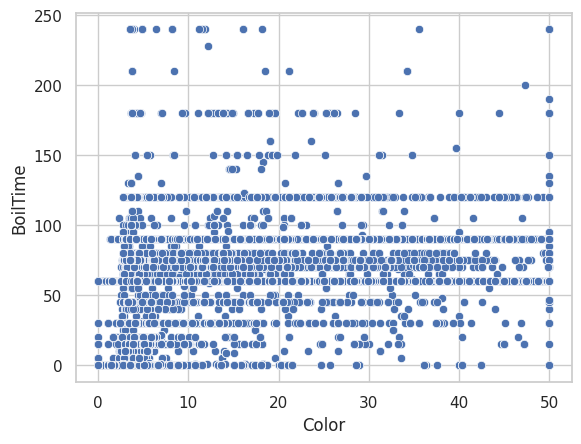

In [144]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.scatterplot(x=concat_data["Color"],y=concat_data["BoilTime"])

Conclusão
---------

Como pode ser visto no gráfico, quando a variável "BoilTime" assume valores pequenos, a cor da cerveja raramente assume valores maiores que 20, enquanto que valores de "BoilTime" entre 50 e 100 

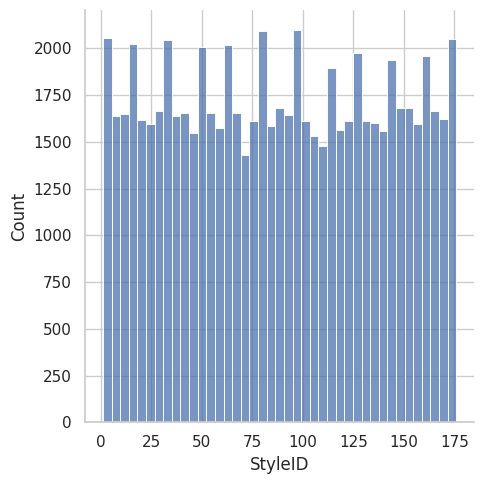

In [145]:
sns.displot(concat_data['StyleID'])

In [146]:
concat_data['PrimaryTemp'] = concat_data['PrimaryTemp'].fillna(value=concat_data['PrimaryTemp'].median())


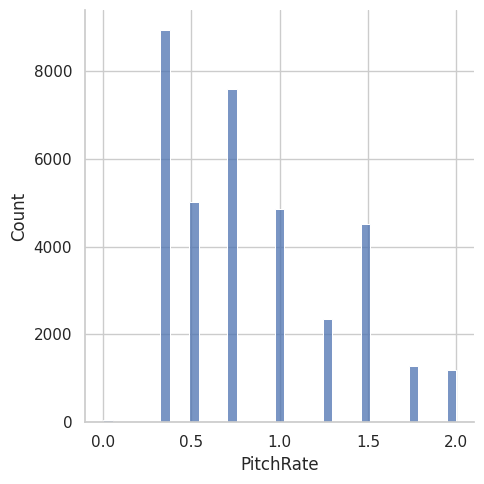

In [147]:
sns.displot(concat_data['PitchRate'])

In [148]:
concat_data['PitchRate'] = concat_data['PitchRate'].fillna(value=concat_data['PitchRate'].mean())
concat_data['MashThickness'] = concat_data['MashThickness'].fillna(value=concat_data['MashThickness'].mean())

In [149]:
concat_data.isna().sum()/len(concat_data)

StyleID          0.0
ABV              0.0
IBU              0.0
Color            0.0
BoilTime         0.0
BoilGravity      0.0
Efficiency       0.0
MashThickness    0.0
PitchRate        0.0
PrimaryTemp      0.0
All Grain        0.0
BIAB             0.0
Partial Mash     0.0
extract          0.0
dtype: float64

In [150]:
concat_data.head()

,StyleID,ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
0,45,5.48,17.65,4.83,75,1.038,70.0,2.095509,0.85325,17.78,1,0,0,0
1,85,8.16,60.65,15.64,60,1.070,70.0,2.095509,0.85325,19.00,1,0,0,0
4,20,6.48,17.84,4.57,90,1.050,72.0,2.095509,0.85325,19.00,1,0,0,0
8,129,5.77,31.63,34.76,75,1.042,73.0,2.095509,0.85325,19.00,1,0,0,0
18,113,4.61,13.64,12.56,90,1.033,70.0,2.095509,0.85325,16.67,1,0,0,0


In [151]:
y = concat_data['StyleID']
x = concat_data.drop(columns=['StyleID'])

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [154]:
from sklearn.ensemble import RandomForestClassifier


n_estimators = [50, 100, 150]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = np.array([2,3,10])
min_samples_split = np.array([3,5,7])
min_samples_leaf = np.array([3,5,7])
rfc = RandomForestClassifier()

params = { 'n_estimators': n_estimators, 'criterion': criterion,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
stratifiedKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)

randomizedSearchResult = RandomizedSearchCV(estimator= rfc, param_distributions=params, cv=stratifiedKfold)

randomizedSearchResult.fit(x,y)

# Training the XGB classifier
print(randomizedSearchResult.best_score_)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=14, shuffle=True),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 2,  3, 10]),
                                        'min_samples_leaf': array([3, 5, 7]),
                                        'min_samples_split': array([3, 5, 7]),
                                        'n_estimators': [50, 100, 150]})

0.5057492210462531
